<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Copy_of_Weighted_Logistic_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
np.random.seed(42)


In [ ]:
def generate_imbalanced_data(n_samples=1000):
  n_class_1=int(n_samples*0.7)
  n_class_2=n_samples-n_class_1

  X1=np.random.normal(loc=2, scale=1, size=(n_class_1, 2))
  y1=np.zeros(n_class_1)

  X2=np.random.normal(loc=4, scale=1.5,size=(n_class_2, 2))
  y2=np.ones(n_class_2)

  X=np.vstack((X1, X2))
  y=np.hstack((y1, y2))

  return X, y

In [ ]:
X, y=generate_imbalanced_data(1000)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class_weights=dict(enumerate(len(y_train)/(2*np.bincount(y_train.astype(int)))))

In [ ]:
weighted_model=LogisticRegression(class_weight=class_weights, random_state=42)
weighted_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.718132854578097, 1: 1.646090534979424},
                   random_state=42)

In [ ]:
unweighted_model=LogisticRegression(random_state=42)
unweighted_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
weighted_pred=weighted_model.predict(X_test)
weighted_pred_proba=weighted_model.predict_proba(X_test)[:, 1]


In [ ]:
unweighted_pred=unweighted_model.predict(X_test)
unweighted_pred_proba=unweighted_model.predict_proba(X_test)[:, 1]

In [ ]:
def print_metrics(y_true, y_pred, y_pred_proba, model_name):
  print(f"\n{model_name}Metrics")
  print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
  print(f"Precision:{precision_score(y_true, y_pred):.3f}")
  print(f'Recall:{recall_score(y_true, y_pred):.3f}')
  print(f"F1 Score:{f1_score(y_true, y_pred):.3f}")

  fpr, tpr, _=roc_curve(y_true, y_pred_proba)
  roc_auc=auc(fpr, tpr)
  print(f"AUC+ROC:{roc_auc:.3f}")

  cm=confusion_matrix(y_true, y_pred)
  print("\nConfusion Matrix:")
  print(cm)
  return fpr, tpr, roc_auc


In [ ]:
w_fpr, w_tpr, w_auc=print_metrics(y_test, weighted_pred, weighted_pred_proba, "Weighted Model")
u_fpr, u_tpr, u_auc=print_metrics(y_test, unweighted_pred, unweighted_pred_proba, 'Unweighted Model')



Weighted ModelMetrics
Accuracy: 0.900
Precision:0.803
Recall:0.860
F1 Score:0.831
AUC+ROC:0.951

Confusion Matrix:
[[131  12]
 [  8  49]]

Unweighted ModelMetrics
Accuracy: 0.925
Precision:0.938
Recall:0.789
F1 Score:0.857
AUC+ROC:0.951

Confusion Matrix:
[[140   3]
 [ 12  45]]


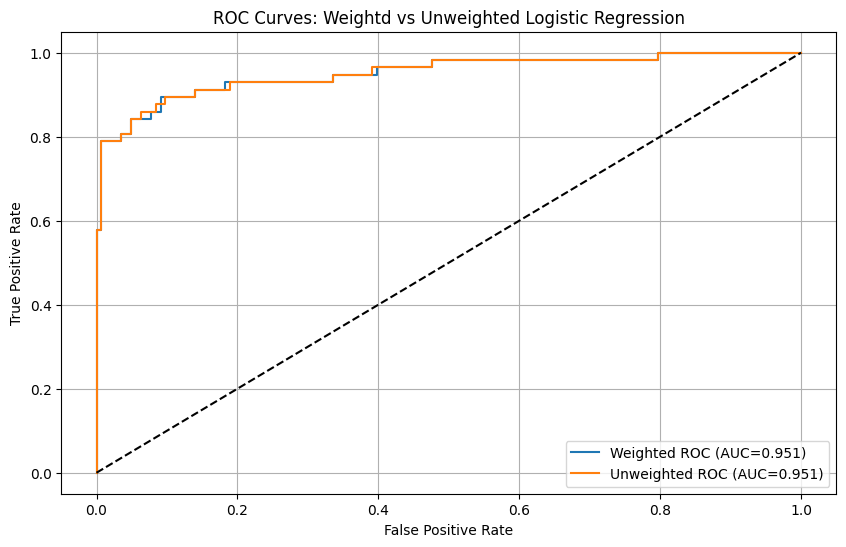

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(w_fpr, w_tpr, label=f'Weighted ROC (AUC={w_auc:.3f})')
plt.plot(u_fpr, u_tpr, label=f"Unweighted ROC (AUC={u_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Weightd vs Unweighted Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def plot_decision_boundary(X, y, model, title):
  h=0.02
  x_min, x_max=X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max=X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z=model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z=Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

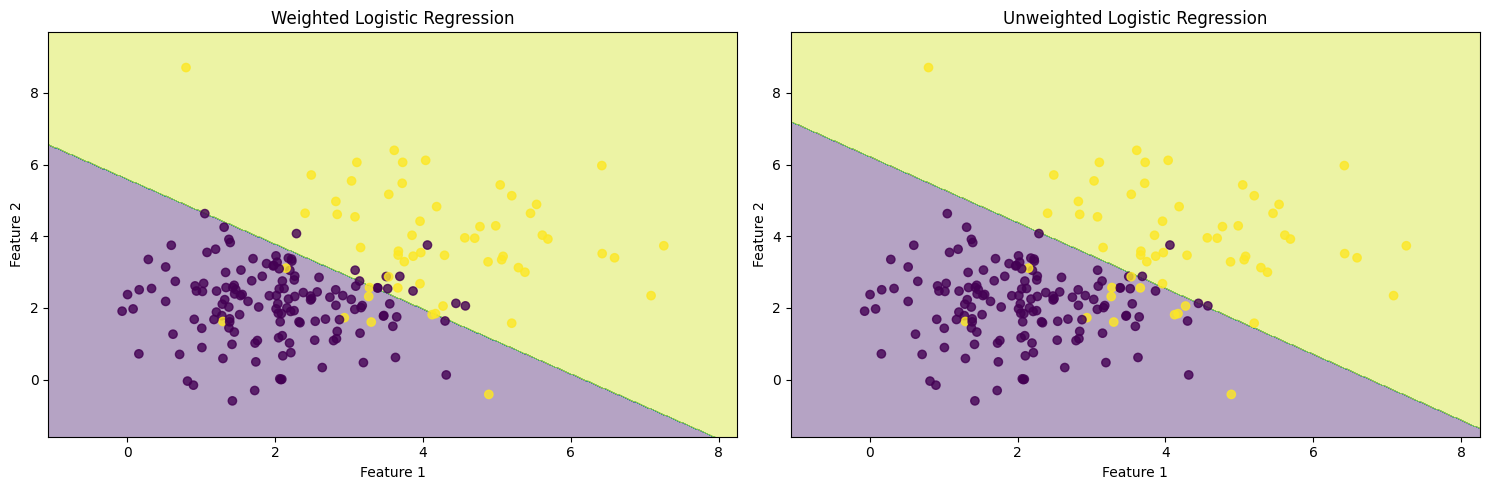

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plot_decision_boundary(X_test, y_test, weighted_model, 'Weighted Logistic Regression')
plt.subplot(122)
plot_decision_boundary(X_test, y_test, unweighted_model, 'Unweighted Logistic Regression')
plt.tight_layout()
plt.show()